In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [2]:
#заданная функция
def F(x):
    return 0.7*x**3+3.4*x**2-12*x+1

#ф-я для итераций
def G(x):
    return (0.7*x**3+3.4*x**2+1)/12

#производная заданной функции
def dF(x):
    return 2.1*x**2+6.8*x-12


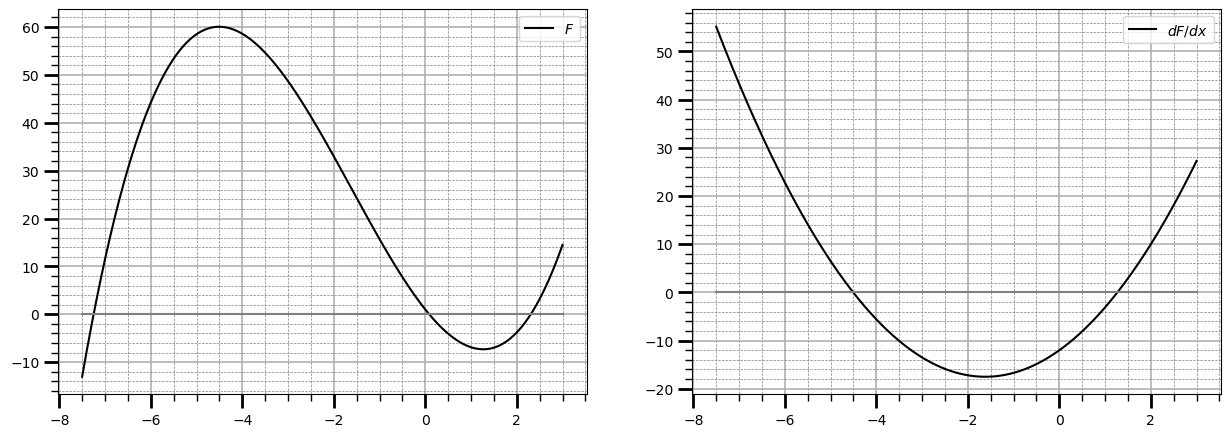

In [3]:
a = -7.5
b = 3.0
x_data = np.linspace(a, b, 1000)

#делаем рисунок из двух графиков
fig,axs = plt.subplots(1, 2, figsize=(15, 5))

#рисуем на первом графике F
axs[0].plot(x_data, F(x_data), label = '$F$', color = "black")
axs[0].plot(x_data, 0*x_data, color = "gray")

#рисуем на первом графике dF
axs[1].plot(x_data, dF(x_data), label = '$dF/dx$', color = "black")
axs[1].plot(x_data, 0*x_data, color = "gray")

axs[0].grid(which="major", linewidth=1.2)
axs[0].grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
axs[0].tick_params(which='major', length=10, width=2)
axs[0].tick_params(which='minor', length=5, width=1)
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].legend()

axs[1].grid(which="major", linewidth=1.2)
axs[1].grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
axs[1].tick_params(which='major', length=10, width=2)
axs[1].tick_params(which='minor', length=5, width=1)
axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].legend()


In [4]:
#ф-я для итераций
def G(x):
    return (0.7*x**3+3.4*x**2+1)/12

# f-исх ф-я, x=g(x)
def SI(f, x, alpha, q, eps):
    x1 = x - alpha*f(x)
    i = 1
    while (np.abs(x1-x)>(1-q)/q*eps):
        x = x1
        x1 = x - alpha*f(x)
        i+=1
    print(i)
    print(x1)
eps = 1e-8
beg1 = -7.0; a1 = 0.02; q1 = 0.5
beg2 = -1.0; a2 = -0.1; q2 = 0.69
beg3 = 3.0; a3 = 0.05; q3 = 0.46

SI(F,G(beg1),a1,q1,eps)
SI(F,G(beg2),a2,q2,eps)
SI(F,G(beg3),a3,q3,eps)

7
-7.249140277698038
10
0.08543794622662709
18
2.3065594724420078


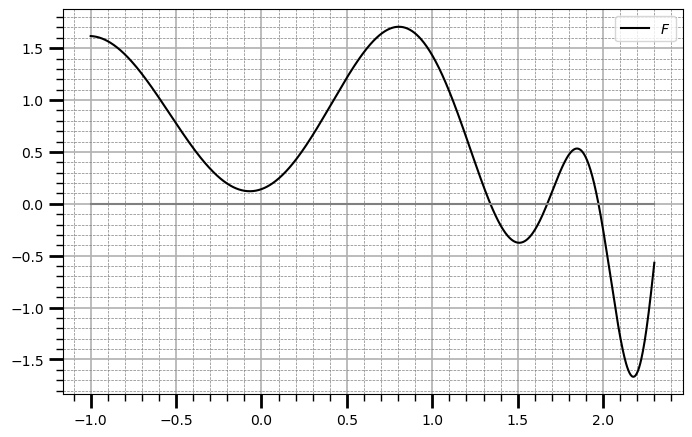

In [5]:
#заданная функция
def f(x):
    return np.sin(3**x)-np.cos(3*x)+0.3

a = -1
b = 2.3
x_data = np.linspace(a, b, 1000)

#делаем график
fig,axs = plt.subplots( figsize=(8, 5))

#рисуем на графике F
axs.plot(x_data, f(x_data), label = '$F$', color = "black")
axs.plot(x_data, 0*x_data, color = "gray")
axs.grid(which="major", linewidth=1.2)
axs.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
axs.tick_params(which='major', length=10, width=2)
axs.tick_params(which='minor', length=5, width=1)
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.legend()


In [6]:
#производная ф-ии
def df(x):
    return 3**x*np.log(3)*np.cos(3**x)+3*np.sin(3*x)

#метод Ньютона
def Newton(f,df,x,eps):
    x1 = x - f(x)/df(x)
    i = 1
    while(np.abs(x1-x)>eps):
        x = x1
        x1 = x - f(x)/df(x)
        i += 1
    print(i)
    print(x1)

#метод ложного положения
def FalsePos(f,x,c,eps):
    x1 = x - (f(x)*(c-x))/(f(c)-f(x))
    i = 1
    while(np.abs(x1-x)>eps):
        x = x1
        x1 = x - (f(x)*(c-x))/(f(c)-f(x))
        i += 1
    print(i)
    print(x1)
    
eps = 1e-15
beg1 = 1.0; beg2 = 1.55389; beg3 = 1.5538
c1 = 1.1; c2 = 1.59; c3 = 1.96

Newton(f,df,beg1,eps)
Newton(f,df,beg2,eps)
Newton(f,df,beg3,eps)

FalsePos(f,beg1,c1,eps)
FalsePos(f,beg2,c2,eps)
FalsePos(f,beg3,c3,eps)

11
1.3400823839083855
10
1.673294933628927
10
1.9730518797929182
18
1.3400823839083855
23
1.6732949336289271
13
1.9730518797929184


In [7]:
#метод Ньютона с массивом
def NewtonMod(f,df,x,eps):
    x1 = x - f(x)/df(x)
    i = 1; r = [];
    r.append(np.abs(f(x1)))
    while(i!=10):
        x = x1
        x1 = x - f(x)/df(x)
        i += 1
        if (i < 11):
            r.append(np.abs(f(x1)))
    return r

#метод ложного положения с массивом
def FalsePosMod(f,x,c,eps):
    x1 = x - (f(x)*(c-x))/(f(c)-f(x))
    i = 1; r = [];
    r.append(np.abs(f(x1)))
    while(i!=10):
        x = x1
        x1 = x - (f(x)*(c-x))/(f(c)-f(x))
        i += 1
        if (i < 11):
            r.append(np.abs(f(x1)))
    return r

rn1=NewtonMod(f,df,beg1,eps)
rn2=NewtonMod(f,df,beg2,eps)
rn3=NewtonMod(f,df,beg3,eps)

rf1=FalsePosMod(f,beg1,c1,eps)
rf2=FalsePosMod(f,beg2,c2,eps)
rf3=FalsePosMod(f,beg3,c3,eps)

print(rn1)
print(rn2)

[0.3753258954790624, 1.5451184958101583, 1.370358719829139, 0.1381494084438562, 0.272206268059274, 0.12172546758876895, 0.8159756895642527, 0.0004265920218419761, 8.053880790059864e-08, 2.0539125955565396e-15]
[0.49428258173182477, 0.3421940121380966, 0.4659153373786656, 0.22772043700036698, 0.06075579095438299, 0.0007594175413966342, 1.7852048245226015e-07, 9.825473767932635e-15, 4.996003610813204e-16, 3.885780586188048e-16]


c:\Users\Admin\anaconda3\envs\pywork\Lib\site-packages\IPython\core\events.py:89: UserWarning: AutoMinorLocator does not work with logarithmic scale
  func(*args, **kwargs)
c:\Users\Admin\anaconda3\envs\pywork\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


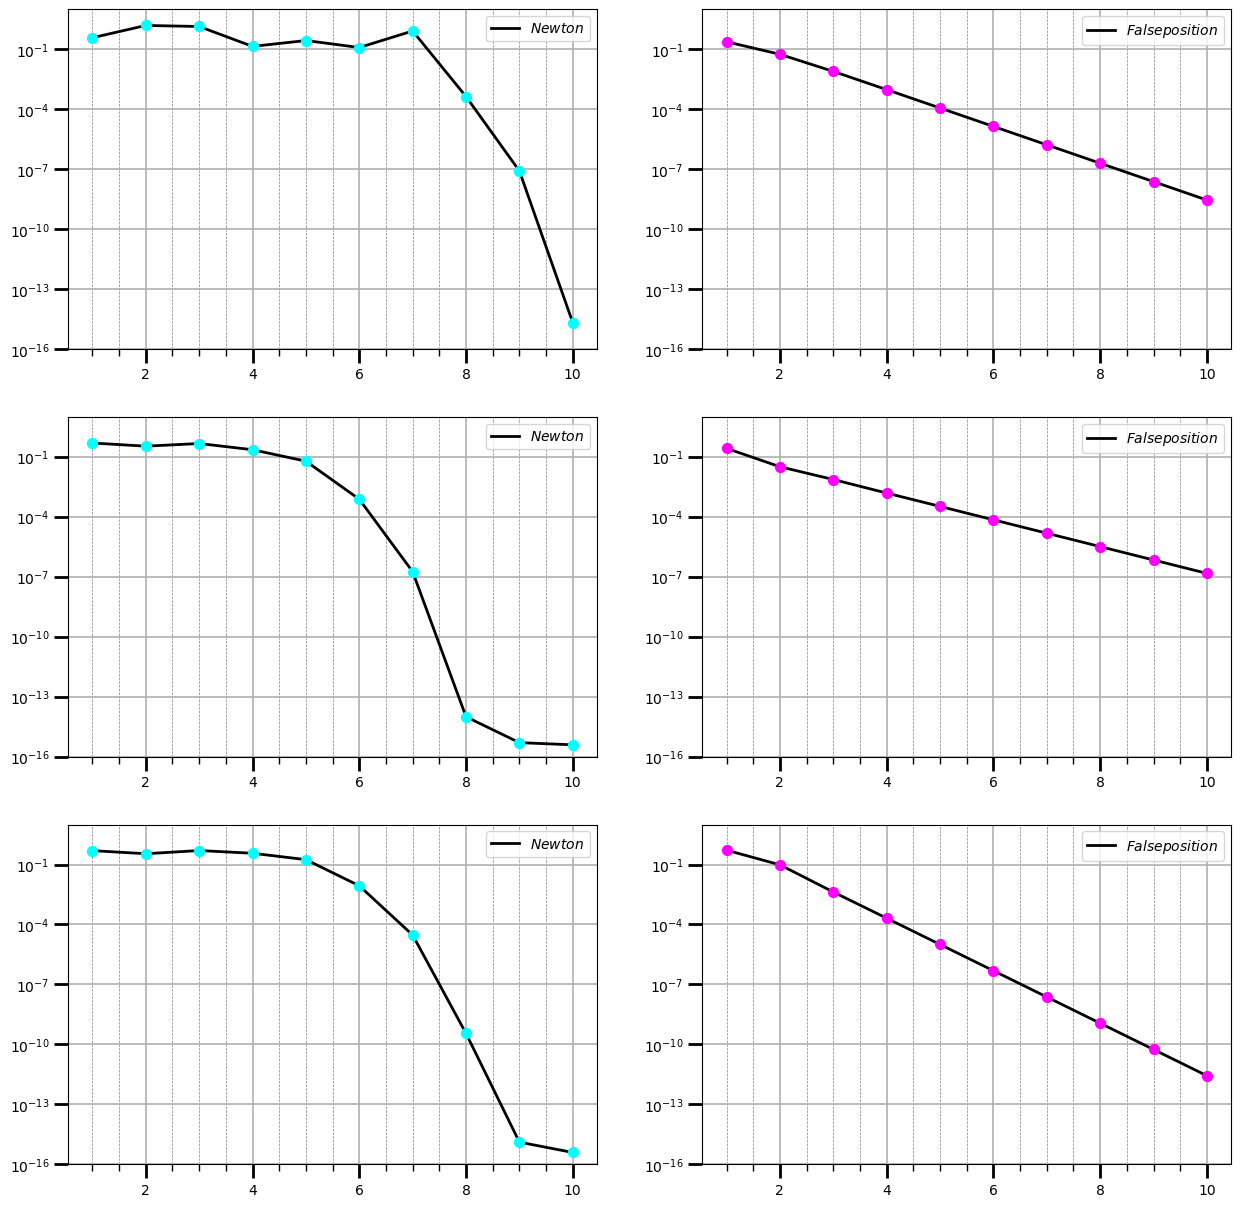

In [8]:

x_data = [1,2,3,4,5,6,7,8,9,10]


#делаем график
fig,axs = plt.subplots(3,2,figsize=(15, 15))

#рисуем на графике F
axs[0][0].scatter(x_data, rn1,50, color = "cyan", zorder = 10)
axs[0][0].plot(x_data, rn1, label = '$Newton$', color = "black", linewidth=2, zorder = 5)

axs[0][0].set_yscale('log')
axs[0][0].grid(which="major", linewidth=1.2)
axs[0][0].grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
axs[0][0].tick_params(which='major', length=10, width=2)
axs[0][0].tick_params(which='minor', length=5, width=1)
axs[0][0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0][0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0][0].set(ylim=(1e-16,10))
axs[0][0].legend()

#
axs[0][1].scatter(x_data, rf1,50, color = "magenta", zorder = 10)
axs[0][1].plot(x_data, rf1, label = '$False position$', color = "black", linewidth=2, zorder = 5)

axs[0][1].set_yscale('log')
axs[0][1].grid(which="major", linewidth=1.2)
axs[0][1].grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
axs[0][1].tick_params(which='major', length=10, width=2)
axs[0][1].tick_params(which='minor', length=5, width=1)
axs[0][1].xaxis.set_minor_locator(AutoMinorLocator())
axs[0][1].yaxis.set_minor_locator(AutoMinorLocator())
axs[0][1].set(ylim=(1e-16,10))
axs[0][1].legend()

#
axs[1][0].scatter(x_data, rn2,50, color = "cyan", zorder = 10)
axs[1][0].plot(x_data, rn2, label = '$Newton$', color = "black", linewidth=2, zorder = 5)

axs[1][0].set_yscale('log')
axs[1][0].grid(which="major", linewidth=1.2)
axs[1][0].grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
axs[1][0].tick_params(which='major', length=10, width=2)
axs[1][0].tick_params(which='minor', length=5, width=1)
axs[1][0].xaxis.set_minor_locator(AutoMinorLocator())
axs[1][0].yaxis.set_minor_locator(AutoMinorLocator())
axs[1][0].set(ylim=(1e-16,10))
axs[1][0].legend()

#
axs[1][1].scatter(x_data, rf2,50, color = "magenta", zorder = 10)
axs[1][1].plot(x_data, rf2, label = '$False position$', color = "black", linewidth=2, zorder = 5)

axs[1][1].set_yscale('log')
axs[1][1].grid(which="major", linewidth=1.2)
axs[1][1].grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
axs[1][1].tick_params(which='major', length=10, width=2)
axs[1][1].tick_params(which='minor', length=5, width=1)
axs[1][1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1][1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1][1].set(ylim=(1e-16,10))
axs[1][1].legend()

#
axs[2][0].scatter(x_data, rn3,50, color = "cyan", zorder = 10)
axs[2][0].plot(x_data, rn3, label = '$Newton$', color = "black", linewidth=2, zorder = 5)

axs[2][0].set_yscale('log')
axs[2][0].grid(which="major", linewidth=1.2)
axs[2][0].grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
axs[2][0].tick_params(which='major', length=10, width=2)
axs[2][0].tick_params(which='minor', length=5, width=1)
axs[2][0].xaxis.set_minor_locator(AutoMinorLocator())
axs[2][0].yaxis.set_minor_locator(AutoMinorLocator())
axs[2][0].set(ylim=(1e-16,10))
axs[2][0].legend()

#
axs[2][1].scatter(x_data, rf3,50, color = "magenta", zorder = 10)
axs[2][1].plot(x_data, rf3, label = '$False position$', color = "black", linewidth=2, zorder = 5)

axs[2][1].set_yscale('log')
axs[2][1].grid(which="major", linewidth=1.2)
axs[2][1].grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
axs[2][1].tick_params(which='major', length=10, width=2)
axs[2][1].tick_params(which='minor', length=5, width=1)
axs[2][1].xaxis.set_minor_locator(AutoMinorLocator())
axs[2][1].yaxis.set_minor_locator(AutoMinorLocator())
axs[2][1].set(ylim=(1e-16,10))
axs[2][1].legend()

-238.88082825727238


24.17266187050359

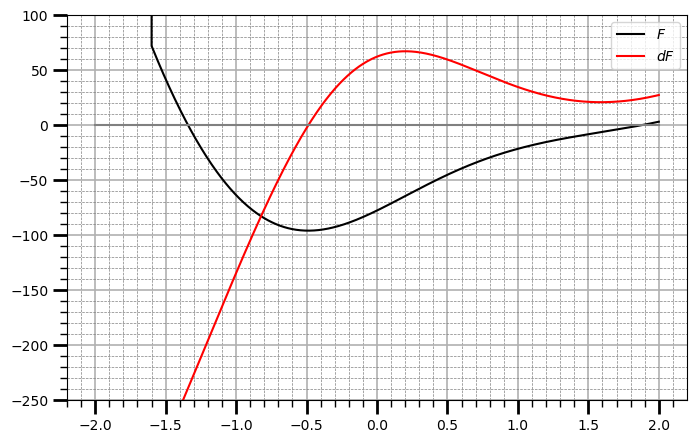

In [9]:
#ф-ия
def f(x):
    return 800*np.arctan((8*x-15)/(10*x+16))-400*x+64*x**2+525

#производная ф-ии
def df(x):
    return 222400/(164*x**2+80*x+481)-400+128*x
    
a = -2
b = 2
x_data = np.linspace(a, b, 1000)

#делаем график
fig,axs = plt.subplots( figsize=(8, 5))

#рисуем на графике F
axs.plot(x_data, f(x_data), label = '$F$', color = "black")
axs.plot(x_data, df(x_data), label = '$dF$', color = "red")
axs.plot(x_data, 0*x_data, color = "gray")
axs.grid(which="major", linewidth=1.2)
axs.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
axs.tick_params(which='major', length=10, width=2)
axs.tick_params(which='minor', length=5, width=1)
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.set(ylim=(-250,100))
axs.legend()

print(df(-1.3405089476973446))
df(1.875000000000001)

In [10]:
#ф-ия
def H(x):
    return 800*np.arctan((8*x-15)/(10*x+16))-400*x+64*x**2+525

#производная ф-ии
def dh(x):
    return 222400/(164*(x**2)+80*x+481)-400+128*x   

#метод Ньютона для кратных корней
def KNewton(f,df,x,eps,k):
    x1 = x - k*(f(x)/df(x))
    i = 1
    while(np.abs(x1-x)>eps):
        x = x1
        x1 = x - k*(f(x)/df(x))
        i += 1
    print(i)
    print(x1)

KNewton(H,dh,2,1e-8,1)
KNewton(H,dh,-1,1e-8,1)

4
1.875000000000001
5
-1.3405089476973446


In [13]:

def g(x):
    return x**3-2*x+2
def dg(x):
    return 3*x**2-2

#метод Ньютона
def Newton(f,df,x,eps):
    x1 = x - f(x)/df(x)
    i = 1
    while(np.abs(x1-x)>eps):
        x = x1
        x1 = x - f(x)/df(x)
        i += 1
    print(i)
    print(x1)
    
def FalsePos(f,x,c,eps):
    x1 = x - (f(x)*(c-x))/(f(c)-f(x))
    i = 1
    while(np.abs(x1-x)>eps):
        x = x1
        x1 = x - (f(x)*(c-x))/(f(c)-f(x))
        #print(x1)
        i += 1
    print(i)
    print(x1)
    
Newton(g,dg,-1.5,1e-4)
FalsePos(g,-1.5,-1,1e-4)
#FalsePos(g,-1.5,0,1e-4)

4
-1.7692923542960053
80
-1.769248572787475
